# Проект и его описание

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Ознакомление с файлами и предобработка данных

Импорт необходимых библиотек и параметров

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

### Ознакомимся с данными файла hypothesis

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.info()
hypothesis.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Дата-сет состоит из пяти полей:
- `Hypothesis` краткое описание гипотезы;
- `Reach` охват пользователей по 10-балльной шкале;
- `Impact` влияние на пользователей по 10-балльной шкале;
- `Confidence` уверенность в гипотезе по 10-балльной шкале;
- `Efforts` затраты ресурсов на проверку гипотезы по 10-балльной шкале.
<br> Наименования столбцов не соответствуют принятым правилам оформления.

Просмотрим уникальные значения

In [3]:
for row in hypothesis:
    print(row)
    print(hypothesis[row].value_counts(dropna=False).sort_index(ascending=True))
    print('*'*60)

Hypothesis
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить акцию, дающую скидку на товар в день рождения                                                         1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Показать на главной странице баннеры с актуальными акциями и распродажами, чт

### Ознакомимся с данными файла orders

In [4]:
orders = pd.read_csv('/datasets/orders.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Дата-сет состоит из пяти полей:
- `transactionId` идентификатор заказа;
- `visitorId`  идентификатор пользователя, совершившего заказ;
- `date` дата, когда был совершён заказ;
- `revenue` выручка заказа;
- `group` группа A/B-теста, в которую попал заказ.
<br> Наименования столбцов соответствует правилам оформления.

Просмотрим уникальные значения

In [5]:
for row in orders:
    print(row)
    print(orders[row].value_counts(dropna=False).sort_index(ascending=True))
    print('*'*60)

transactionId
1062393       1
4919758       1
7210578       1
8131427       1
11068804      1
             ..
4276811111    1
4279408906    1
4281129020    1
4288552432    1
4293855558    1
Name: transactionId, Length: 1197, dtype: int64
************************************************************
visitorId
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: visitorId, Length: 1031, dtype: int64
************************************************************
date
2019-08-01    45
2019-08-02    44
2019-08-03    40
2019-08-04    33
2019-08-05    48
2019-08-06    46
2019-08-07    42
2019-08-08    43
2019-08-09    41
2019-08-10    39
2019-08-11    26
2019-08-12    47
2019-08-13    35
2019-08-14    47
2019-08-15    46
2019-08-16    38
2019-08-17    24
2019-08-18    26
2019-08-19    43
2019-08-20    32
2019-08-21    37
2019-08-22    41
2019-08-23    40
2019-08-24    

### Ознакомимся с данными файла visitors

In [6]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Дата-сет состоит из трех полей:
- `date` дата;
- `group` группа A/B-теста;
- `visitors` количество пользователей в указанную дату в указанной группе A/B-теста
<br> Наименования столбцов соответствует правилам оформления.

Просмотрим уникальные значения

In [7]:
for row in visitors:
    print(row)
    print(visitors[row].value_counts(dropna=False).sort_index(ascending=True))
    print('*'*60)

date
2019-08-01    2
2019-08-02    2
2019-08-03    2
2019-08-04    2
2019-08-05    2
2019-08-06    2
2019-08-07    2
2019-08-08    2
2019-08-09    2
2019-08-10    2
2019-08-11    2
2019-08-12    2
2019-08-13    2
2019-08-14    2
2019-08-15    2
2019-08-16    2
2019-08-17    2
2019-08-18    2
2019-08-19    2
2019-08-20    2
2019-08-21    2
2019-08-22    2
2019-08-23    2
2019-08-24    2
2019-08-25    2
2019-08-26    2
2019-08-27    2
2019-08-28    2
2019-08-29    2
2019-08-30    2
2019-08-31    2
Name: date, dtype: int64
************************************************************
group
A    31
B    31
Name: group, dtype: int64
************************************************************
visitors
361    1
369    1
378    1
395    1
406    1
412    1
413    1
421    1
468    1
487    1
490    2
502    1
507    1
509    1
531    1
543    1
544    1
546    1
560    1
575    1
577    1
581    1
594    1
595    1
609    1
610    2
617    1
619    1
621    1
628    1
644    1
646    1
650    

### Проверим таблицы на явные дубликаты

In [8]:
i = 1
for row in (hypothesis, orders, visitors):
    print('В таблице', i, 'явных дубликатов', row.duplicated().sum())
    print('*'*60)
    i += 1

В таблице 1 явных дубликатов 0
************************************************************
В таблице 2 явных дубликатов 0
************************************************************
В таблице 3 явных дубликатов 0
************************************************************


### Предобработка данных

Из очевидных несоответствий - дата в формате object. Переведем дату (в первой и второй таблице) в формат даты

In [9]:
orders['date'] = orders['date'].astype('datetime64')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].astype('datetime64')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))

Наименования столбцов файла hypothesis не соответствует установленным правилам (змеиному регистру)

In [10]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head().T

,0,1,2,3,4
hypothesis,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей","Запустить собственную службу доставки, что сократит срок доставки заказов","Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...","Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар","Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"
reach,3,2,8,8,3
impact,10,5,3,3,1
confidence,8,4,7,3,1
efforts,6,10,3,8,1


### Вывод по главе 1

Предобработка данных завершена успешно

## Приоритизация гипотез

###  Приоритизации гипотез при помощи фреймворка ICE

Расчетная формула имеет вид
$$ICE = \frac{impact * confidence}{efforts}$$

In [11]:
hypothesis['ice'] = (
    hypothesis['impact'] * 
    hypothesis['confidence'] / 
    hypothesis['efforts']
).round(2)
print(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

                                                                                            hypothesis  \
8                                              Запустить акцию, дающую скидку на товар в день рождения   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                     Изменить цвет фона главн

### Приоритизации гипотез при помощи фреймворка RICE

Расчетная формула имеет вид
$$RICE = \frac{rearch * impact * confidence}{efforts}$$

In [12]:
hypothesis['rice'] = (
    hypothesis['reach'] * 
    hypothesis['impact'] * 
    hypothesis['confidence'] / 
    hypothesis['efforts']
).round(2)
print(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

                                                                                            hypothesis  \
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
8                                              Запустить акцию, дающую скидку на товар в день рождения   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
4                     Изменить цвет фона главн

### Выводы по главе 2

- При применении критерия ice наиболее приорететными являются гипотезы 8, 0 и 7
- При применении критерия rice наиболее приорететной является гипотеза 7, также важными являются гипотезы 2, 0 и 6 
<br>
<br> Различие возникает по причине того, что в ходе расчета не принималось во внимание сколько пользователей затронет данная гипотеза (максимальный охват как раз у гипотезы 7 - 10 баллов из 10)
<br> 
<br> При комплексном рассмотрении критериев `ice` и `rice` примем, что приоритетными гипотезами будут:
- **гипотеза 7** добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
- **гипотеза 2** добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
- **гипотеза 0** добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей     

## Проверка датасетов на корректность заполнения

Проверим есть ли пользователи, у которых нет ни одной группы

In [13]:
dubl_users_0 = orders.groupby('visitorId').agg({'group': 'nunique'}).query('group == 0')
dubl_users_0.shape[0]

0

Проверим есть ли пользователи, у которых две группы

In [14]:
dubl_users_2 = orders.groupby('visitorId').agg({'group': 'nunique'}).query('group == 2')
print(dubl_users_2.shape[0])
dubl_users_2.head()

58


,group
visitorId,
8300375,2
199603092,2
232979603,2
237748145,2
276558944,2


Существует 58 пользователей, которые попали и в группу А, и в группу В (как как на этапе предобработки мы посмотрели уникальные значения групп и увидели, что на самом деле группы бывают только А и В)
<br> Оставим данные пользователей и не будем их удалять, так как иначе таблица visitors будет содержать некооректные данные с данными пользователями  

## Непараметрический тест Уилкоксона-Манна-Уитни 

Для количества поcетителей в группах А и В
<br> Нулевая гипотеза Н0 - между количеством посетителей в группах А и В есть различия
<br> Альтернативная гипотеза Н1 - между количеством посетителей в группах А и В нет различий

Примем уровень значимости 0,05

In [15]:
visitors_A = visitors[visitors['group']=='A']['visitors'].sum()
visitors_B = visitors[visitors['group']=='B']['visitors'].sum()
print('Количество посетителей в группе А:', visitors_A, 
      'Количество посетителей в группе B:', visitors_B, sep='\n')
print('p-значение:', '{0:.3f}'.format(
    stats.mannwhitneyu(visitors_A, visitors_B)[1]
)
     )

Количество посетителей в группе А:
18736
Количество посетителей в группе B:
18916
p-значение: 1.000


Отвергаем нулевую гипотезу, следовательно, **разница в количестве посетителей в группах A и B статистически не значима**

Для количества заказов в группах А и В
Нулевая гипотеза Н0 - между количеством заказов в группах А и В есть различия
Альтернативная гипотеза Н1 - между количеством заказов в группах А и В нет различий

Следовательно, так как разница в количестве посетителей в группах A и B статистически не значима, то можно приступать к анализу проведенного A/B-теста

In [17]:
# CODE REVIEWER
orders[orders['group']=='A'].count()

transactionId    557
visitorId        557
date             557
revenue          557
group            557
dtype: int64

## Анализ A/B-теста

### График кумулятивной выручки по группам

In [18]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                    orders['group'] == x['group']
                                   )]
    .agg(
        {'date' : 'max', 
         'group' : 'max', 
         'transactionId' : 'nunique', 
         'visitorId' : 'nunique', 
         'revenue' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                      visitors['group'] == x['group']
                                     )]
    .agg(
        {'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head()) 

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


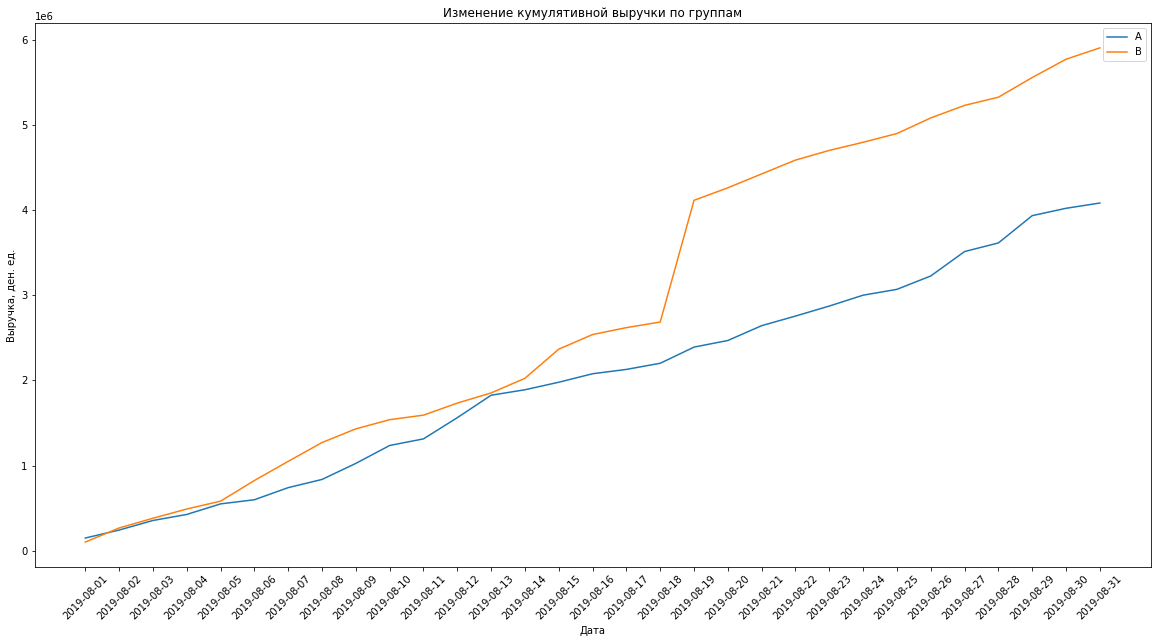

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.ylabel('Выручка, ден. ед.')
plt.xlabel('Дата')
plt.title('Изменение кумулятивной выручки по группам')
plt.xticks(rotation=45)
plt.show();

Выручка почти равномерно увеличивается в течение всего теста, но при этом графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.
<br> Вынеем предположение, что 18-19 августа 2019 года в группе В произошло какое-то аномальное событие, либо было очень много заказов, либо был один очень крупный заказ
<br> Проверим это

In [20]:
orders_inf_B = orders[orders['group']=='B'][['date','revenue']]
B_18_19 = orders_inf_B.query('"2019-08-18" <= date <= "2019-08-19"')

print(B_18_19.max(), B_18_19.min(), B_18_19.mean())

date       2019-08-19
revenue       1294500
dtype: object date       2019-08-18
revenue            50
dtype: object revenue    49858.366667
dtype: float64


Следовательно, действительно 19 августа 2019 года был совершен аномально большой заказ с выручкой около 1,3 млн. руб. Это спровоцировало скачок кумулятивной выручки в группе В

###  График кумулятивного среднего чека по группам

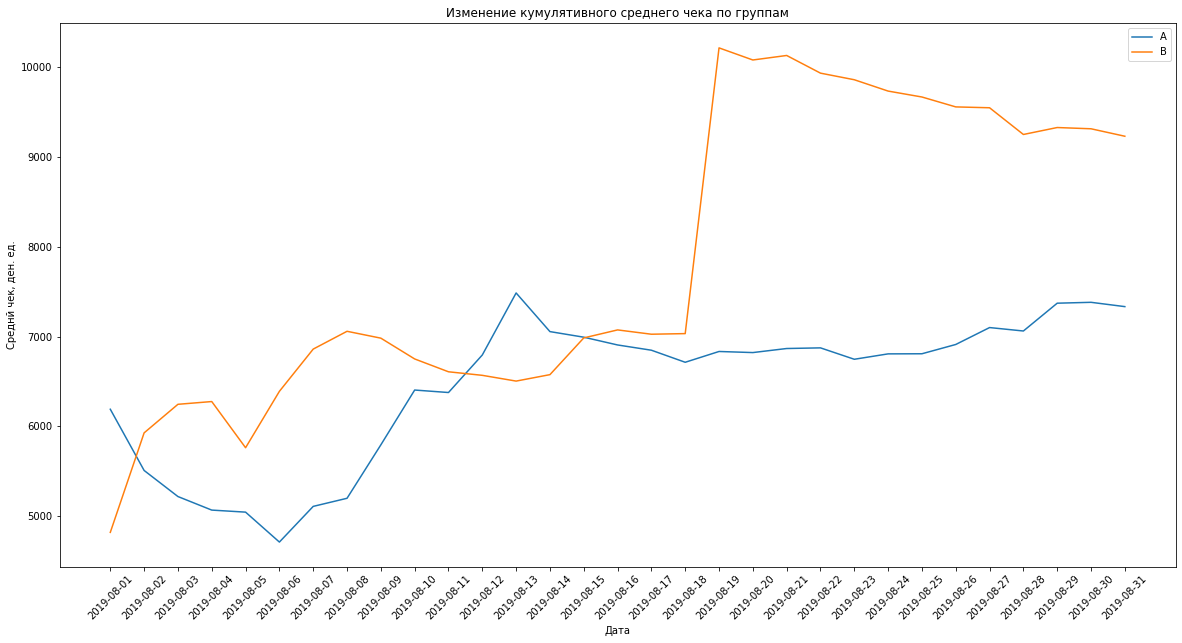

In [21]:
plt.plot(
    cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A'
)
plt.plot(
    cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B'
)
plt.legend()
plt.title('Изменение кумулятивного среднего чека по группам')
plt.ylabel('Среднй чек, ден. ед.')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.show();

Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. 
<br> Выше мы обратили внимание на то, что в группе B 19 августа был совершен очень крупный заказ (что дало резкий всплеск на графике)

### График относительного изменения кумулятивного среднего чека группы B к группе A

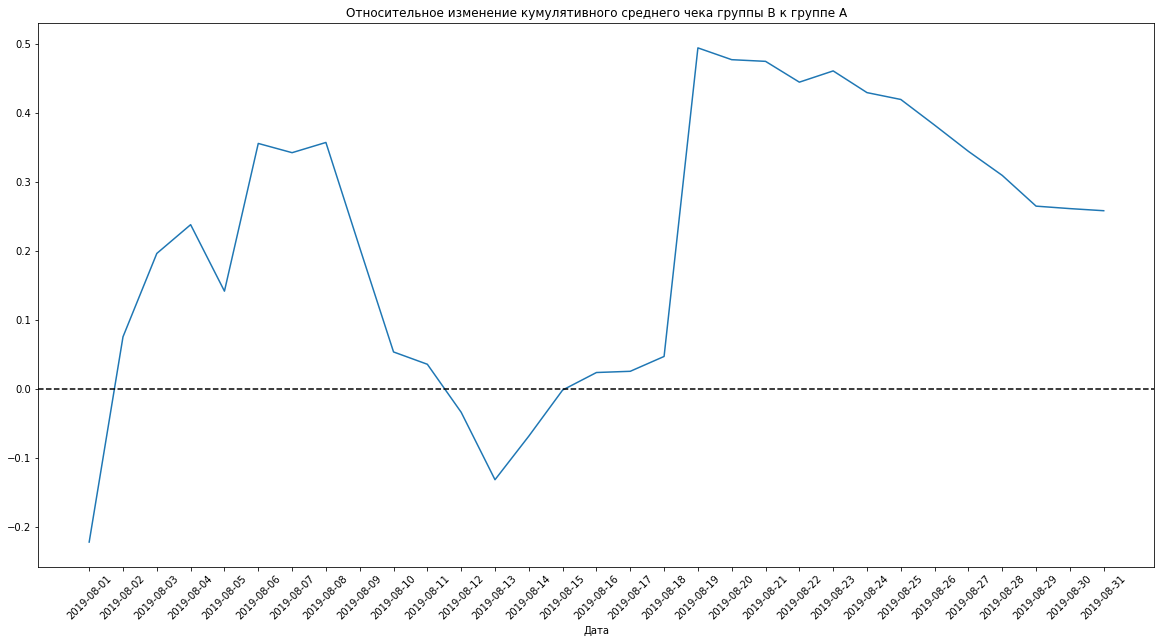

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.plot(
    mergedCumulativeRevenue['date'], 
    (
        mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
    (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']
    )-1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе А')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.show();

В нескольких точках график различия между сегментами резко «скачет», это обусловлено особо крупными заказами

### График кумулятивной конверсии по группам

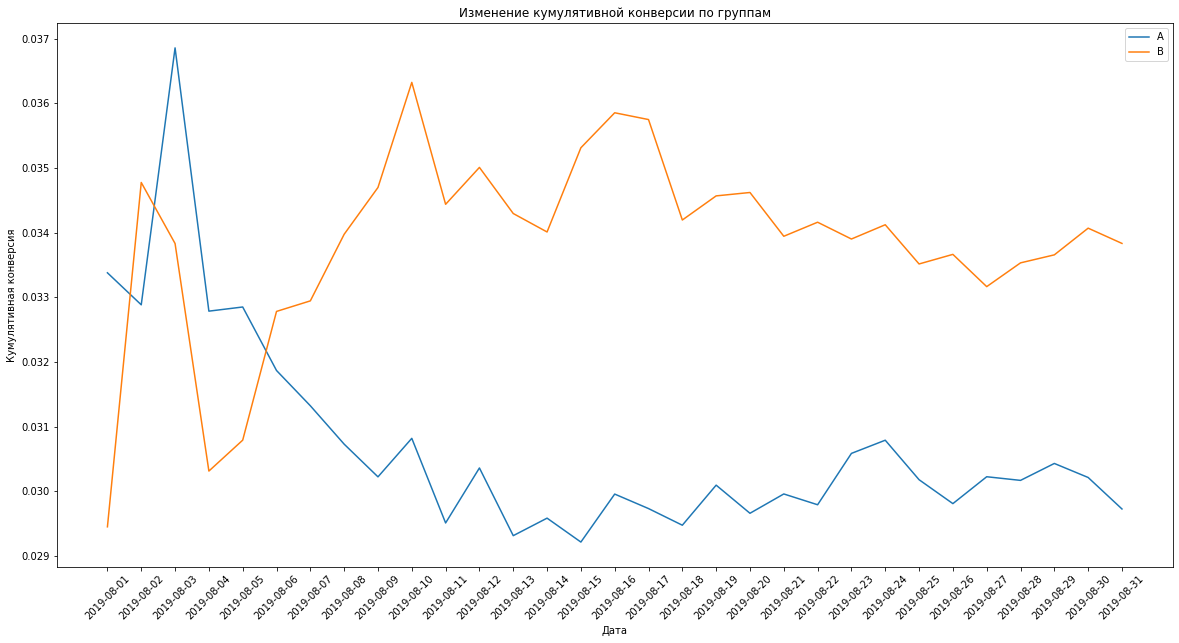

In [23]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Изменение кумулятивной конверсии по группам')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.show();

Группы колебались около одного значения, но затем конверсия группы В намного вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### График относительного изменения кумулятивной конверсии группы B к группе A

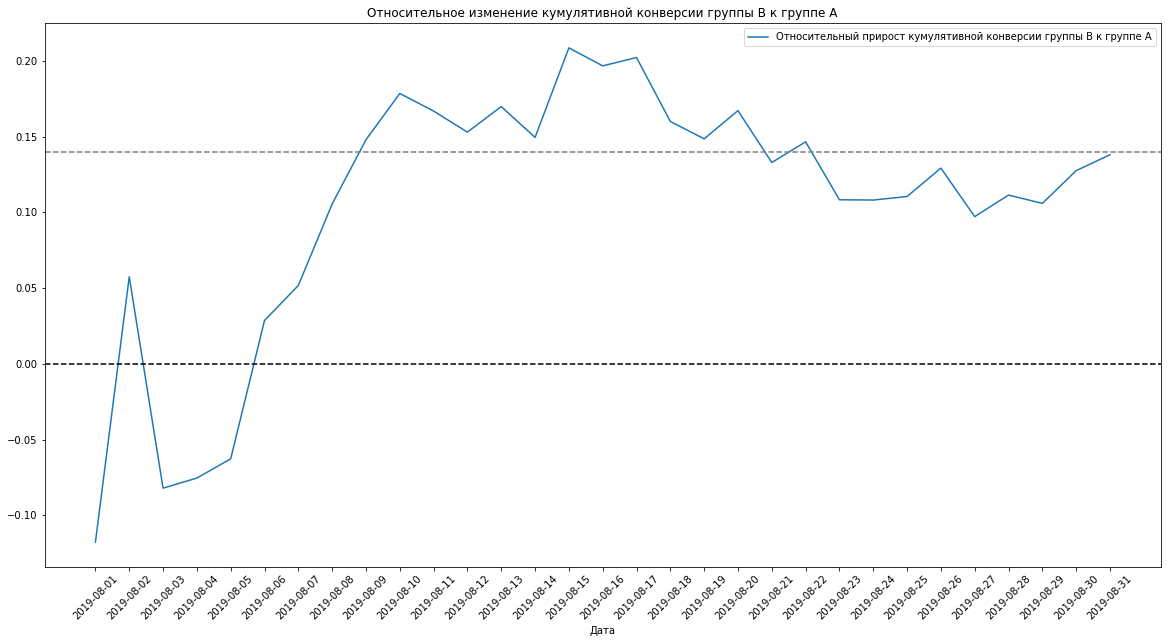

In [24]:
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
).merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост кумулятивной конверсии группы B к группе A"
)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе А')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.show();

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт.

### Точечный график количества заказов по пользователям


In [25]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


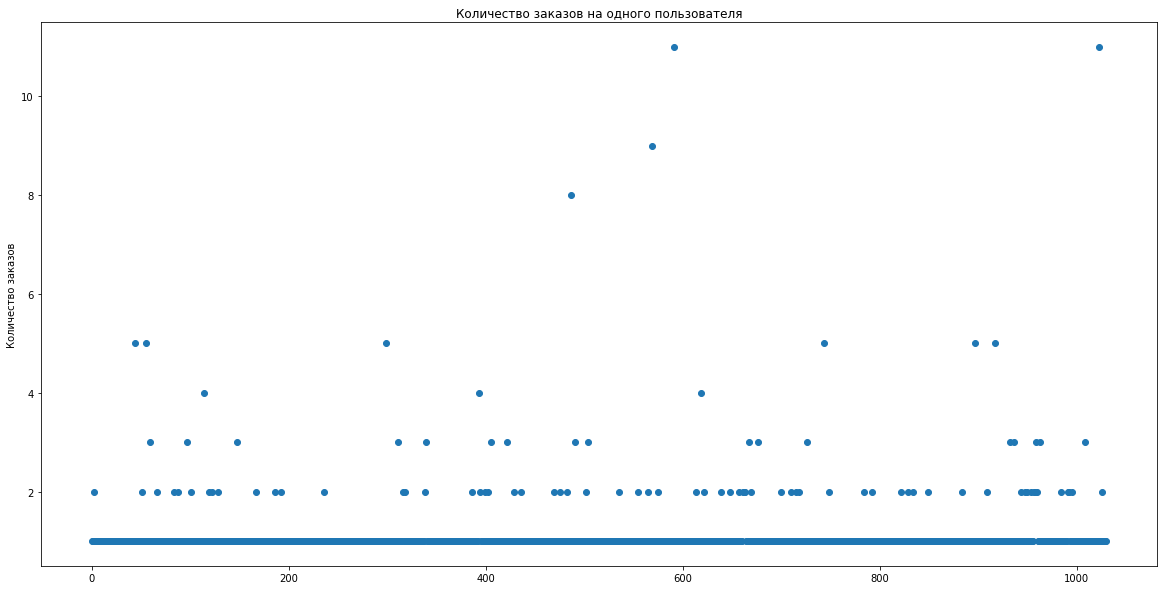

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов на одного пользователя')
plt.ylabel('Количество заказов')
plt.show();

Есть много пользователей с 2-6 заказами, пользователей, которые совершили более 6 заказов единичное количество

### Расчет 95-й и 99-й перцентили количества заказов на пользователя


In [27]:
percentile_users = np.percentile(ordersByUsers['orders'], [90, 95, 99])
print(percentile_users)

[1. 2. 4.]


Не более 5% пользователей совершили 2 задака и не более 1% 4 заказа
<br> За нижнюю границу числа заказов выберем 2 заказа

### Точечный график стоимостей заказов

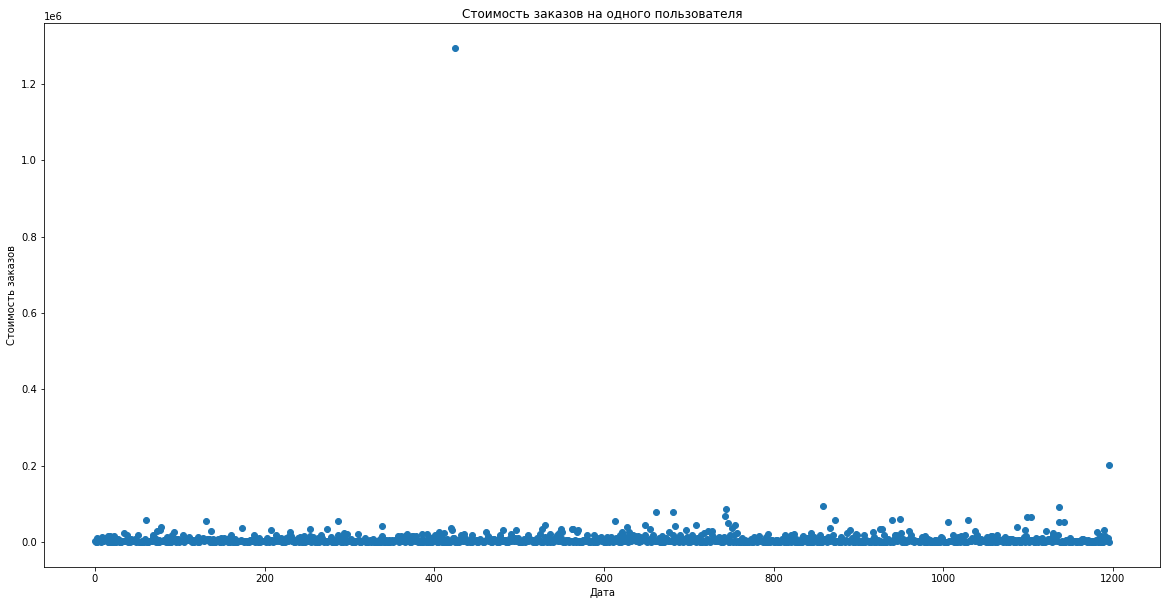

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов на одного пользователя')
plt.ylabel('Стоимость заказов')
plt.xlabel('Дата');

Есть один очень дорогой заказ. По графику можно выбрать границу аномальных заказов около 0,2 ден. ед.
<br> Для уточнения рассчитаем 95 и 99 перцентили

### Расчет 95-й и 99-й перцентили стоимости заказов


In [29]:
percentile_orders = np.percentile(orders['revenue'], [90, 95, 99])
print(percentile_orders) 

[18168.  28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233,2 рублей
<br> За нижнюю границу стоимости заказов выберем 28 000 руб.

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [32]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

pd.Series(0, index=np.arange(
    data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
), name='orders')
[ordersByUsersA['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
                      ), name='orders')]

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
                          ), name='orders')],axis=0
)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
                          ), name='orders')],axis=0
)

Нулевая гипотеза Н0: в исходных данных в конверсии между группами нет статистически значимых различий
<br> Альтернативная гипотеза Н1: в исходных данных в конверсии между группами есть статистически значимые различия

In [33]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print(
    "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/
                     (data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)
)

0.017
0.138


По «сырым» данным есть различия в конверсии групп A и B.
<br> Первое число — p-value = 0.017 меньше 0.05. 
<br> Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 
<br> Относительный проигрыш группы B равен 13.8% — второе число в выводе.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза Н0: в исходных данных в среднем чеке заказа между группами нет статистически значимых различий
Альтернативная гипотеза Н1: в исходных данных в среднем чеке заказа между группами есть статистически значимые различия

In [34]:
print('{0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                       orders[orders['group']=='B']['revenue']
                      )[1])
     )
print('{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
     )

0.729
0.259


Первое число — p-value = 0.729 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не отвергаем.
<br> Второе число в выводе, относительный выигрыш группы B равен 25.9%

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

Узнаем, сколько всего аномальных пользователей методом shape()

Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 28 000 рублей. 

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > percentile_users[1]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > percentile_users[1]]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_orders[1]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
(74,)


Всего 74 аномальных пользователя

Нулевая гипотеза Н0: в очищенных данных в конверсии между группами нет статистически значимых различий
Альтернативная гипотеза Н1: в очищенных данных в конверсии между группами есть статистически значимые различия

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.173


Результаты по конверсии немного изменились. 
<br> По «очищенным» данным по прежнему есть различия в конверсии групп A и B.
<br> Первое число — p-value = 0.013 меньше 0.05.
<br> Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.
<br> Относительный выигрыш группы B равен 17.3% — второе число в выводе.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза Н0: в очищенных данных в среднем чеке заказа между группами нет статистически значимых различий Альтернативная гипотеза Н1: в очищенных данных в среднем чеке заказа между группами есть статистически значимые различия

In [37]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


P-value немного увеличился, он по прежнему больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем.
<br> Но при этом средний чек группы В стал на 2% ниже, чем у группы А
<br> Удаленные аномальные пользователи критично изменили картину по среднему чеку. Так как по сырым данным относительный выигрыш группы B равен 25.9%.

## Общий вывод по проекту

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

**Примем вариант 1 - Остановить тест, зафиксировать победу группы В**

Это обусловлено тем, что во-первых, даже по сырым данным группа В лидировала и по выручке, и по конверсии
<br> Во-вторых, после удаления аномальных данных выигрыш группы B по конверсии хоть вырос до 17,3%, группа В уверенно лидирует
<br> В-третьих, после удаления аномальных данных выигрыш группы B по среднему чеку хоть и очень заметно снизился с 25,9 до -2%, но при этом разница с группой А осталась не существенной (всего 2%)
<br> В-четвертых, разница показателей конверсии между группами и до, и после очистки данных является статистически значимой.
Это дает нам возможность признатьт победу группы В 